None


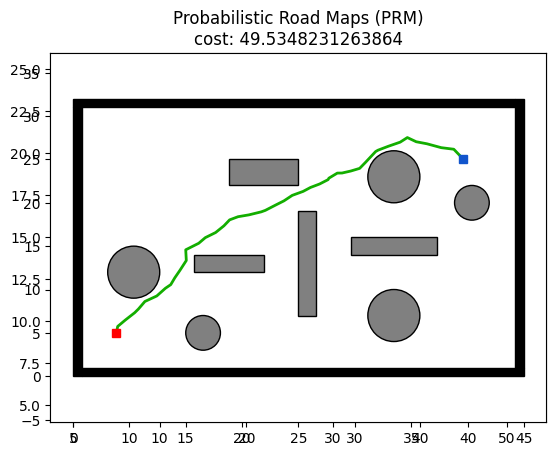

In [20]:
from path_planning.utils.util import read_grid_from_yaml, read_map_from_yaml
import python_motion_planning as pmp
from path_planning.global_planner.sample_search.prm import PRM
# env = read_grid_from_yaml("/home/bho36/Documents/code/Path-Planning/path_planning/environment/grid/grid.yaml")
env = read_map_from_yaml("/home/bho36/Documents/code/Path-Planning/path_planning/environment/map/map.yaml")
# planner = pmp.AStar(start=(5, 5), goal=(45, 25), env=env)   # create planner
# cost, path, expand = planner.plan()                         # plan
# planner.plot.animation(path, str(planner), cost, expand) 

planner = PRM(start=(5, 5), goal=(45, 25), env=env)
cost, path, expand = planner.plan()
print(expand)
planner.plot.animation(path, str(planner), cost, expand)

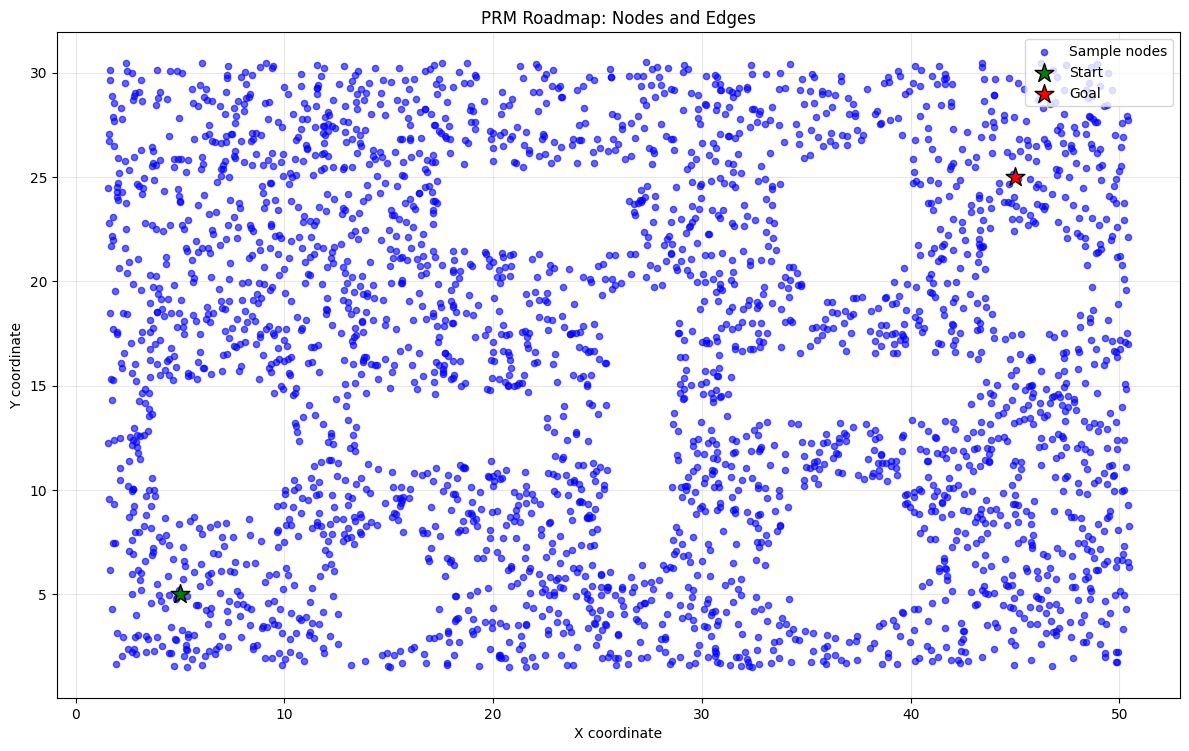

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Rectangle, Circle

def plot_roadmap(planner, path=None):
    """
    Plot the PRM roadmap showing nodes, edges, obstacles, and path.
    
    Args:
        planner: PRM planner instance with road_map, sample_list, and env attributes
        path: Optional path to plot (list of (x, y) tuples)
    """
    # Extract node coordinates (same way as in generate_roadmap)
    samples = planner.sample_list
    road_map = planner.road_map
    env = planner.env
    
    # Get x and y coordinates directly from nodes
    x_coords = [node.x for node in samples]
    y_coords = [node.y for node in samples]
    
    # Create figure
    fig, ax = plt.subplots(figsize=(12, 8))
    
    # Plot obstacles first (lowest zorder so they appear behind everything)
    rect_label_added = False
    circ_label_added = False
    
    # Plot rectangular obstacles
    if hasattr(env, 'obs_rect') and env.obs_rect:
        for rect in env.obs_rect:
            if len(rect) == 4:
                x, y, width, height = rect
                label = 'Rectangular obstacles' if not rect_label_added else ''
                rectangle = Rectangle((x, y), width, height, 
                                     facecolor='black', edgecolor='darkred', 
                                     linewidth=1.5, alpha=0.7, zorder=0, label=label)
                ax.add_patch(rectangle)
                rect_label_added = True
    
    # Plot circular obstacles
    if hasattr(env, 'obs_circ') and env.obs_circ:
        for circ in env.obs_circ:
            if len(circ) == 3:
                x, y, radius = circ
                label = 'Circular obstacles' if not circ_label_added else ''
                circle = Circle((x, y), radius, 
                               facecolor='black', edgecolor='darkred', 
                               linewidth=1.5, alpha=0.7, zorder=0, label=label)
                ax.add_patch(circle)
                circ_label_added = True
    
    # Plot all edges
    for i, edges in enumerate(road_map):
        x1, y1 = x_coords[i], y_coords[i]
        for edge_idx in edges:
            if edge_idx < len(x_coords):  # Safety check
                x2, y2 = x_coords[edge_idx], y_coords[edge_idx]
                ax.plot([x1, x2], [y1, y2], 'gray', linewidth=0.5, alpha=0.3, zorder=1)
    
    # Plot all nodes
    ax.scatter(x_coords, y_coords, c='blue', s=20, alpha=0.6, zorder=2, label='Sample nodes')
    
    # Plot path if provided
    if path and len(path) > 0:
        path_x = [p[0] for p in path]
        path_y = [p[1] for p in path]
        ax.plot(path_x, path_y, 'orange', linewidth=3, alpha=0.8, zorder=3, label='Path')
        # Mark path points
        ax.scatter(path_x, path_y, c='orange', s=50, alpha=0.8, zorder=3, marker='o', edgecolors='darkorange')
    
    # Highlight start and goal nodes (they are the last two nodes in sample_list)
    start_idx = len(samples) - 2
    goal_idx = len(samples) - 1
    
    if start_idx >= 0 and start_idx < len(x_coords):
        ax.scatter(x_coords[start_idx], y_coords[start_idx], c='green', s=200, 
                   marker='*', zorder=4, label='Start', edgecolors='black', linewidths=1)
    if goal_idx >= 0 and goal_idx < len(x_coords):
        ax.scatter(x_coords[goal_idx], y_coords[goal_idx], c='red', s=200, 
                   marker='*', zorder=4, label='Goal', edgecolors='black', linewidths=1)
    
    # Set axis limits based on environment
    ax.set_xlim(0, env.x_range)
    ax.set_ylim(0, env.y_range)
    
    # Set labels and title
    ax.set_xlabel('X coordinate')
    ax.set_ylabel('Y coordinate')
    ax.set_title('PRM Roadmap: Nodes, Edges, Obstacles, and Path')
    ax.legend(loc='upper right')
    ax.grid(True, alpha=0.3)
    ax.set_aspect('equal', adjustable='box')
    
    plt.tight_layout()
    plt.show()

# Plot the roadmap with obstacles and path
plot_roadmap(planner, path=path)

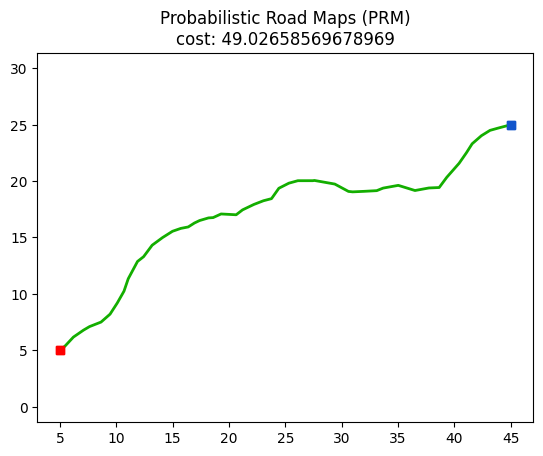

In [17]:
planner.plot.animation(path, str(planner), cost, expand)